## INVESTMENT CASE STUDY

### Case Study Brief
**You work for *Spark Funds*, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that they can take the investment decisions effectively.**

**Spark Funds has two minor constraints for investments:**

- **It wants to invest between 5 to 15 million USD per round of investment**

- **It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.**

### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
c=pd.read_excel('companies.xlsx')

In [3]:
r=pd.read_excel('rounds2.xlsx')

In [4]:
c.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01 00:00:00
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,2010-01-01 00:00:00


In [5]:
r.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [6]:
# checking the unique values
len(c.permalink.unique())

66368

In [7]:
c.shape

(66368, 10)

In [8]:
r.shape

(114949, 6)

In [9]:
len(r.company_permalink.unique())

90247

There are more companies_permalink than permalink, this may be case-sensetive, hence converting all the company link names to lower case.

In [10]:
c.permalink=c.permalink.str.lower()

In [11]:
r.company_permalink=r.company_permalink.str.lower()

In [12]:
len(r.company_permalink.unique())

66368

In [13]:
len(c.permalink.unique())

66368

There are same number of unique companies in both the DataFrames.

In [14]:
#checking if these two are same
c[~c.permalink.isin(r.company_permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


All the companies in c.permalink are present in r.company_permalink.

## Missing Value Treatment

Now we check for missing value treatment. 

Check the number of missing values in both the dataframes.

In [15]:
#checking missing values in c and r
c.isnull().sum()

permalink            0
name                 5
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [16]:
r.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Since there are no missing values in company permalink mering those two DataFrames.

In [17]:
#renaming the company_permalink column in r to permalink
r.rename(columns={'company_permalink':'permalink'},inplace=True)

In [18]:
r.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [19]:
#merging c and r DataFrames on permalink
df=pd.merge(c,r,how='inner',on='permalink')
df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-09-04 00:00:00,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,2007-01-01 00:00:00,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [20]:
#checking for duplicated rows
df[df.duplicated()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   permalink                114949 non-null  object        
 1   name                     114944 non-null  object        
 2   homepage_url             108815 non-null  object        
 3   category_list            111539 non-null  object        
 4   status                   114949 non-null  object        
 5   country_code             106271 non-null  object        
 6   state_code               104003 non-null  object        
 7   region                   104782 non-null  object        
 8   city                     104785 non-null  object        
 9   founded_at               94428 non-null   object        
 10  funding_round_permalink  114949 non-null  object        
 11  funding_round_type       114949 non-null  object        
 12  funding_round_co

In [22]:
#checking for fraction of missing values in master DataFrame columns
df.isnull().sum()

permalink                      0
name                           5
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [23]:
round(100*(df.isnull().sum()/len(df.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Clearly, the column ```funding_round_code``` is useless (with about 73% missing values). Also, for the business objectives given, the columns ```homepage_url```, ```founded_at```, ```state_code```, ```region``` and ```city``` need not be used.

Thus, we drop these columns.

In [24]:
#dropping columns
df=df.drop(['funding_round_code','homepage_url','founded_at', 'state_code', 'region', 'city'],axis=1)
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2008-03-19,2000000.0


In [25]:
round(100*(df.isnull().sum()/len(df.index)),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that the column ```raised_amount_usd``` is an important column, since that is the number we want to analyse (compare, means, sum etc.). That needs to be carefully treated. 

Also, the column ```country_code``` will be used for country-wise analysis, and ```category_list``` will be used to merge the dataframe with the main categories.

Checking with  missing values in ```raised_amount_usd```.


In [26]:
df.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart. 

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows. 

We thus remove the rows having NaNs in ```raised_amount_usd``` which acts as a target variable.

In [27]:
df=df[~np.isnan(df.raised_amount_usd)]

In [28]:
round(100*(df.isnull().sum()/len(df.index)),2)

permalink                  0.00
name                       0.01
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [29]:
df.country_code.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
MNE        1
DMA        1
DZA        1
SEN        1
SOM        1
Name: country_code, Length: 134, dtype: int64

We see thea most number of investments have happened in USA. We can also see the fractions.

In [30]:
100*(df.country_code.value_counts()/len(df.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
         ...    
MNE     0.001053
DMA     0.001053
DZA     0.001053
SEN     0.001053
SOM     0.001053
Name: country_code, Length: 134, dtype: float64

Now, we can either delete the rows having ```country_code``` missing (about 6% rows), or we can impute them by ```USA```. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

In [31]:
#deleating rows with NaN country code
df=df[~df.country_code.isnull()]

In [32]:
round(100*(df.isnull().sum()/len(df.index)),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Here the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in ```category_list```. We thus remove those as well. 

We could have simply let the missing values in the dataset and continued the analysis. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).

In [33]:
df=df[~df.category_list.isnull()]

In [34]:
round(100*(df.isnull().sum()/len(df.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [35]:
# after missing value treatment, approx 77% observations are retained
100*(len(df.index) / len(r.index))

77.01589400516751

# Analysis


Here we'll conduct three types of analyses - funding type, country analysis, and sector analysis.


## Funding Type Analysis

Here we compare the funding amounts across the funding types. Also, we need to impose the constraint that the investment amount should be between 5 and 15 million USD. We will choose the funding type such that the average investment amount falls in this range.

In [36]:
# filtering the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]



In [37]:
df.shape

(75124, 9)

Here we have to compute a **representative value of the funding amount** for each type of invesstment.Here we can either choose the mean or the median and having a look at the distribution of ```raised_amount_usd``` to get a sense of the distribution of data.


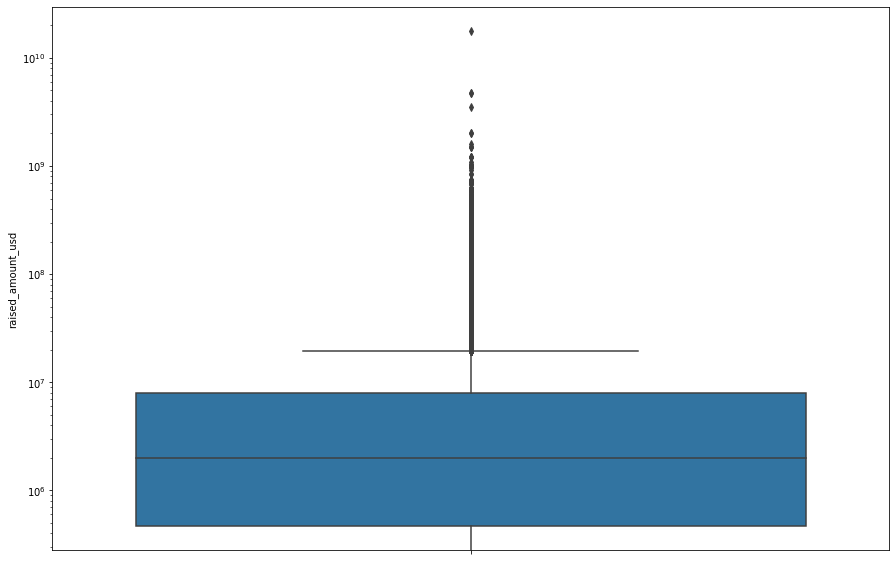

In [38]:
# distribution of raised_amount_usd is shown using boxplot.
plt.figure(figsize=[15,10])
sns.boxplot(y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

In [39]:
df.raised_amount_usd.describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Figuring out that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. 

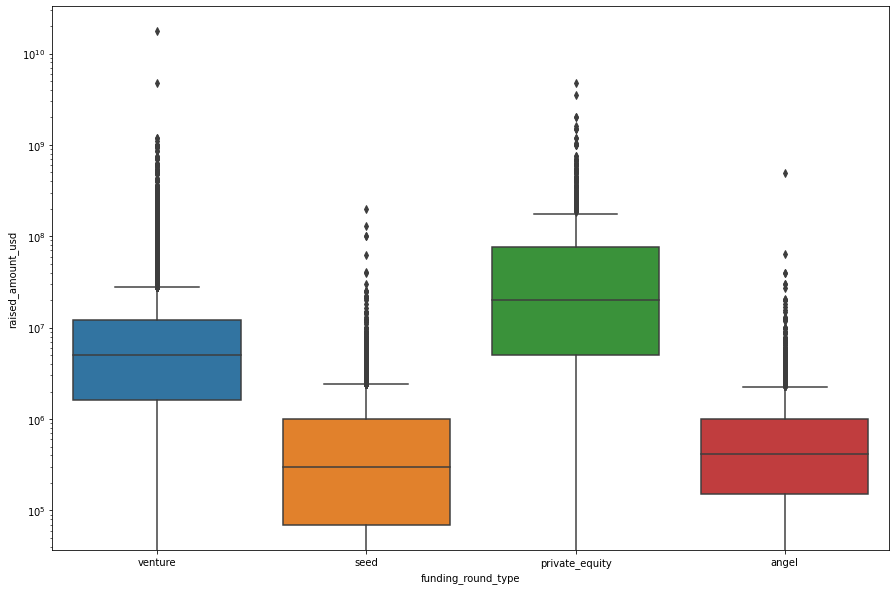

In [40]:
#Comparing the raised_amount_usd with the different type of funding using box-plot 
plt.figure(figsize=[15,10])
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [41]:
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

From the above box-plots it is indicating that there are many outliers in the raised_amount_usd across each funding type ,which takes the mean away from the **medain** as we can seen from the pivot table.Hence median can be the **representative value of the funding amount** across each funding amount.

In [42]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20M, which is beyond Spark Funds' range of 5-15M. The median of 'venture' type is about USD 5M, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis

Now we compare the total investment amounts across countries.Filtering the data only for the 'venture' type investments and then compare the 'total investment' across countries.

In [43]:
#filtering df for only venture type
df=df[df.funding_round_type=='venture']

In [44]:
#grouping by country codes and comparing total amount
df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

In [45]:
#extracting top 9 countries from the above list
df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9]

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Among the top 9 countries, USA, GBR and IND are the top three English speaking countries.Hence we filter the dataframe so that it contains only the top 3 countries.

In [46]:
df=df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]

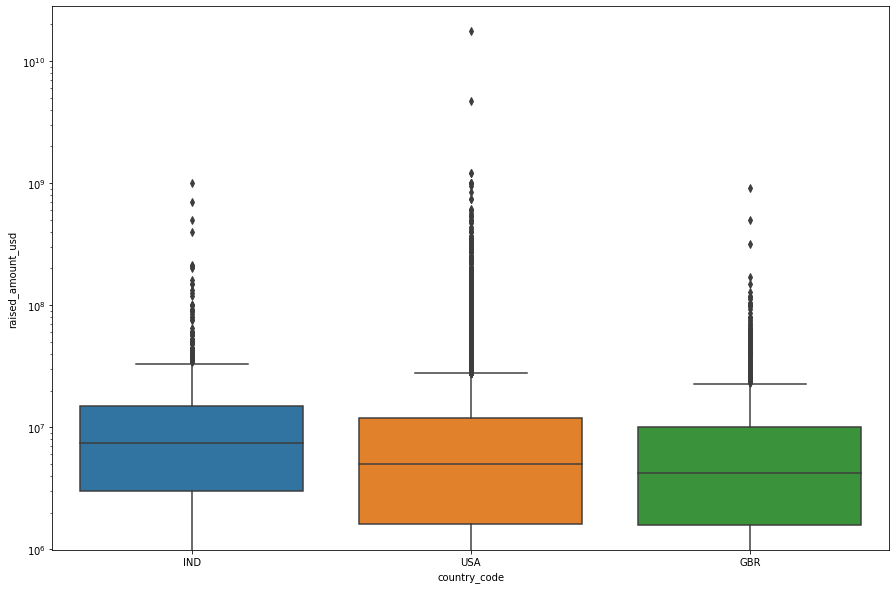

In [47]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=[15,10])
sns.boxplot(y=df.raised_amount_usd,x=df.country_code)
plt.yscale('log')
plt.show()


## Sector Analysis

First, we need to extract the main sector using the column ```category_list```. 

In [48]:
df.category_list

0                                    Media
10                               Analytics
11                               Analytics
12                               Analytics
22        Apps|Cable|Distribution|Software
                        ...               
114920                       Biotechnology
114922                       Biotechnology
114923                       Biotechnology
114934                          E-Commerce
114936                       Biotechnology
Name: category_list, Length: 38803, dtype: object

The category_list column contains values such as 'Apps|Cable|Distribution|Software' - in this, 'Apps' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [49]:
df['category_list']=df['category_list'].apply(lambda x: x.split('|')[0])

Hence we extracted only main category list.

In [50]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,2015-11-09,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,2013-01-03,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,2014-07-19,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,2015-03-17,5000000.0


In [51]:
# importing mapping DataFrame
m=pd.read_csv('mapping.csv')
m

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
#checking for NaN values
m.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [53]:
#removing NaNs
m=m[~pd.isnull(m.category_list)]

In [54]:
m.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [55]:
# now before merging 'm' with 'df' let us first convert category list to lower frames to both DataFrames.
m['category_list'] = m['category_list'].str.lower()
df['category_list'] = df['category_list'].str.lower()

In [56]:
df.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0
10,/organization/0xdata,H2O.ai,analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,2015-11-09,20000000.0


In [57]:
m.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0


In [58]:
mdf=pd.merge(df,m,how='inner',on='category_list')
mdf.head(5)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,0,0,0,1,0,0,0,0,0


In [59]:
#Replacing 1 with corresponding column names for columns [9 to end]
for x in mdf.columns[9::]:
    mdf[x]=mdf[x].apply(lambda y:x if y==1 else '')
mdf.head(5)   


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,,,,Entertainment,,,,,
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,,,,Entertainment,,,,,
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,,,,Entertainment,,,,,
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,,,,Entertainment,,,,,
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,,,,Entertainment,,,,,


In [60]:
#Creating new column named Sector.
mdf['Sector']=''
for x in mdf.columns[9:-1]:
    mdf['Sector']=mdf['Sector']+mdf[x]
mdf.head(5)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,,,,Entertainment,,,,,,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,,,,Entertainment,,,,,,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,,,,Entertainment,,,,,,Entertainment
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,,,,Entertainment,,,,,,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,,,,Entertainment,,,,,,Entertainment


In [61]:
#Dropping the columns with sector names
mdf=mdf.drop(list(mdf.columns[9:-1]),axis=1)
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,Entertainment
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,2014-03-26,18000000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...
36182,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/67e2a4f223ba195d75c516c02157e269,venture,2010-12-29,3500000.0,Others
36183,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,2013-07-22,4220000.0,Others
36184,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2009-06-25,2000000.0,Others
36185,/organization/yapta,Yapta,tracking,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,2015-07-29,1786563.0,Others


The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'Sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [62]:
# first, let's also filter for investment range between 5 and 15m USD
mdf=mdf[(mdf['raised_amount_usd'] >= 5000000) & (mdf['raised_amount_usd'] <= 15000000)]
mdf

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,2015-01-05,10000000.0,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,2015-10-06,15000000.0,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,2013-05-07,5800000.0,Entertainment
4,/organization/all-def-digital,All Def Digital,media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,2014-08-06,5000000.0,Entertainment
14,/organization/chefs-feed,ChefsFeed,media,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,2015-02-26,5000000.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...
36171,/organization/wizrocket-technologies,CleverTap,consumer behavior,operating,USA,/funding-round/195738852853780cc8f1220ba6fb761d,venture,2015-08-03,8000000.0,"Social, Finance, Analytics, Advertising"
36175,/organization/user-interface,User Interface,user interface,operating,USA,/funding-round/ade267714c6ee533323f46a25b2db237,venture,2001-01-24,8250000.0,Others
36176,/organization/vector-watch,Vector Watch,watch,operating,GBR,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,2015-11-25,5000000.0,Others
36177,/organization/washio,Washio,service industries,operating,USA,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,2014-06-09,10500000.0,Others


In [63]:
mdf.groupby(['country_code','Sector'])['raised_amount_usd'].agg(['count','sum'])

count           sum
country_code Sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 127  1.136905e+09
             Entertainment                               54  4.615111e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     143  1.249124e+09
             Social, Finance, Analytics, Advertising     98  8.218884e+08
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     109  1.007410e+09
             Social, Finance, Analytics, Advertising     32  2.905435e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2297  2.118100e+10
             Entertainment                              580  5.000213e+09
             Health                                     908  8.200859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1563  1.379682e+10
             Others                                    2923  2.608928e+10
             Social, Finance, Analytics, Advertising   1912  1.668070e+10

This will be much more easy to understand using a plot.

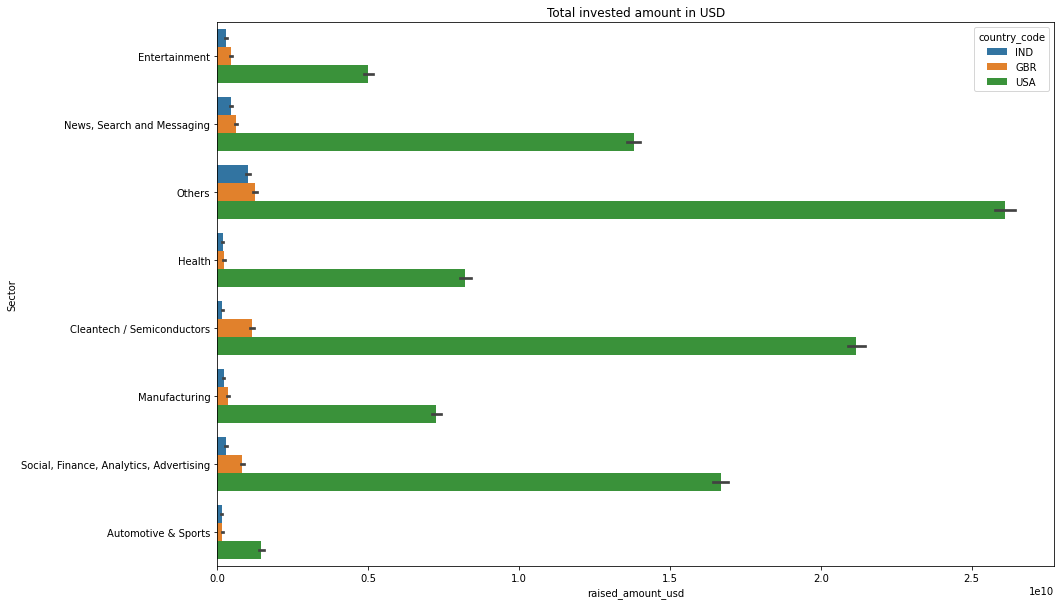

In [64]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=[15,10])

sns.barplot(y=mdf.Sector,x=mdf.raised_amount_usd,hue=mdf.country_code,estimator=np.sum)
plt.title('Total invested amount in USD')
plt.show()

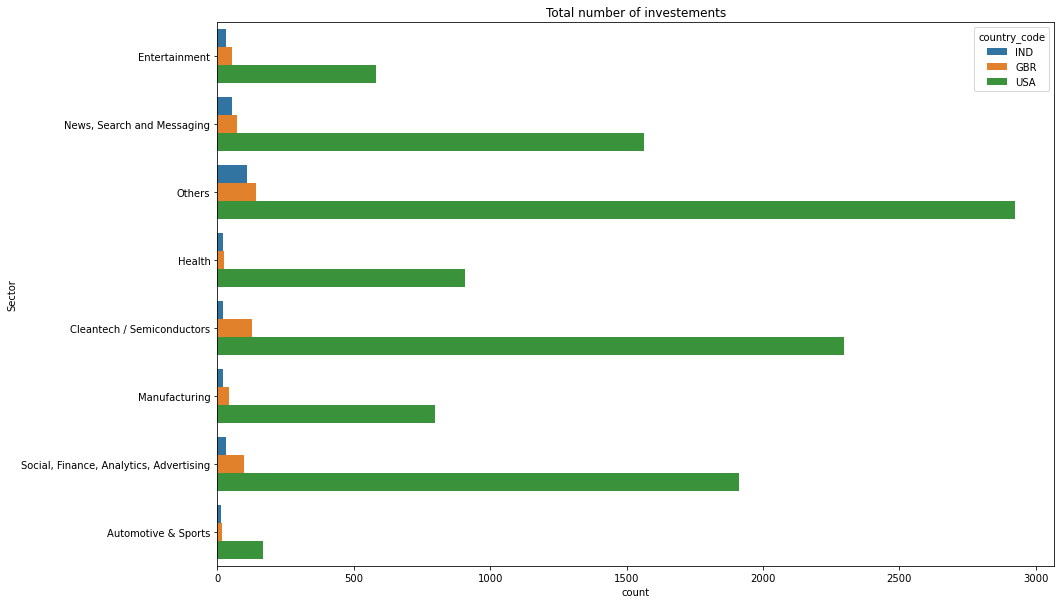

In [65]:
plt.figure(figsize=[15,10])
sns.countplot(y=mdf.Sector,hue=mdf.country_code)
plt.title('Total number of investements')
plt.show()

**Thus, the top country in terms of the number of investments (and the total amount invested) is the USA.**

**The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.**